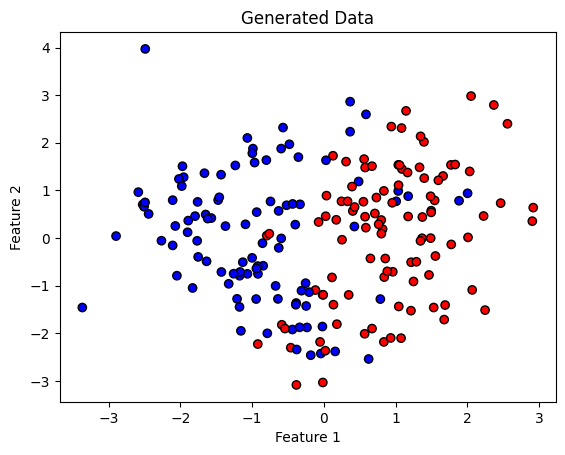

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 生成二分类数据集
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# 数据可视化
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []  # 用于记录损失

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y, y_pred):
        # 交叉熵损失
        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            # 线性模型
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # 计算梯度
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # 记录损失
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            # 打印训练进度
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]



Epoch 0: Loss = 0.6931471785599453
Epoch 100: Loss = 0.5863500672611859
Epoch 200: Loss = 0.5199667412046284
Epoch 300: Loss = 0.47654148290752707
Epoch 400: Loss = 0.44662708922812827
Epoch 500: Loss = 0.42509098657195415
Epoch 600: Loss = 0.4090200014826862
Epoch 700: Loss = 0.39667412317515827
Epoch 800: Loss = 0.38696315107813606
Epoch 900: Loss = 0.3791746827747995


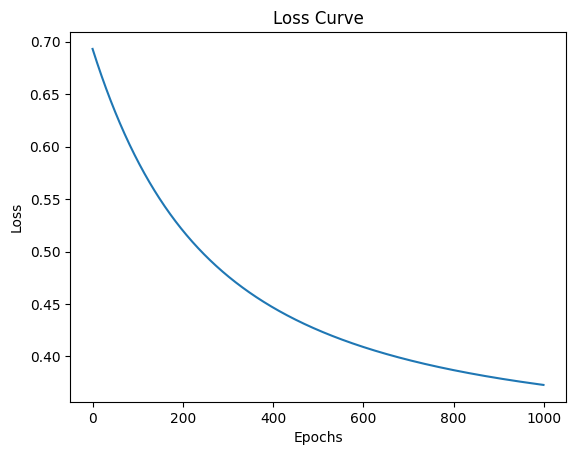

In [3]:
# 训练模型
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# 绘制损失曲线
plt.plot(model.losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


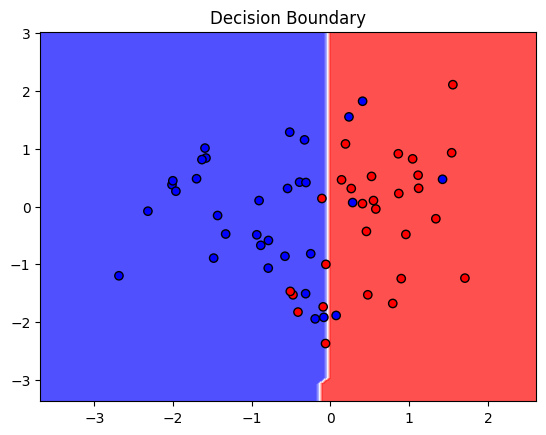

In [4]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)
